In [7]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\SSAFY\Desktop\pjt\SSAFYNEWS-Data\denv\Scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
import os

print(os.path.exists("./ssafy_dataset_news_2024_1st_half.csv"))

True


In [9]:
with open("./ssafy_dataset_news_2024_1st_half.csv", 'rb') as f:
    print(f.read(100))  # 처음 100바이트만 읽기

b'company|title|link|published|category|category_str|reporter|article\r\n\xeb\x94\x94\xec\xa7\x80\xed\x84\xb8\xed\x83\x80\xec\x9e\x84|\xed\x86\xb5\xec\x8b\xa0\xec\x82\xac\xea\xb0\x80 \xec\x9d'


In [10]:
with open("./ssafy_dataset_news_2024_1st_half.csv", 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i == 5536547:  # 줄 인덱스는 0부터 시작
            print(line)
            break


In [ ]:
import pandas as pd

data = pd.read_csv(
    "./ssafy_dataset_news_2024_1st_half.csv",
    engine='python',
    on_bad_lines='warn',
    sep="|"
)

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
data.head(10)

In [ ]:
data.tail()

In [ ]:
print(data['article'][0])

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data[data['title'].isnull()]

In [ ]:
data[data['title'].isnull()].head(10)['link']

In [ ]:
# title이 null이고, 그 중 첫 번째 행의 article 출력
print(data[data['title'].isnull()].iloc[0]['article'])

In [ ]:
data[data['reporter'].isnull()].head()['link']

In [ ]:
data[data['article'].isnull()].head()['link']

In [ ]:
data[data['category'].notnull()].head(5)

In [ ]:
(data.isnull().sum() / len(data)) * 100

In [ ]:
data.isnull().sum()

article과 reporter가 없는건 데이터를 찾을 수도 없음 -> 제거거
title은 54개에 불과하니 제거해도 무방할듯
category는 ai로 생성하면 됨.
category_str은 필요 없음

In [ ]:
data2 = data.dropna(subset=['title', 'reporter', 'article'])

In [ ]:
data2.isnull().sum()

In [ ]:
data.shape

In [ ]:
data2.shape

In [ ]:
import pandas as pd

# 정규표현식을 활용하여 article 열 내 특수문자 제거
data2['article'] = data2['article'].str.replace(r'[\n\r\t]', '', regex=True)

In [ ]:
data2.shape

In [ ]:
data2 = data2[data2['article'].str.len() > 100]    

In [ ]:
data2.shape

In [ ]:
main_data = data2[['title', 'reporter', 'link', 'article', 'published', 'category']].reset_index(drop=True)

In [ ]:
main_data.to_csv("news_init.csv")

In [16]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\SSAFY\Desktop\pjt\SSAFYNEWS-Data\denv\Scripts\python.exe -m pip install --upgrade pip' command.


In [102]:
import pandas as pd
main_data = pd.read_csv('news_init.csv', index_col=0)
main_data['news_id'] = main_data.index + 1  # 1부터 시작
main_data

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_20960\3973853738.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data = pd.read_csv('news_init.csv', index_col=0)


,title,reporter,link,article,published,category,news_id
0,통신사가 이런 것도?…시린 옆구리에 현실판 `나는솔로` 찾는 사람들,김나인 기자,http://www.dt.co.kr/contents.html?article_no=2...,성향과 취향 등을 분석해 케미(호흡)가 잘 맞는 남녀 12명이 1박 2일로 여행을 ...,2024-01-01 19:05:00,NaN,1
1,"`여신도 9명 40여 차례 성폭행` 이재록 목사, 형집행정지 중 사망",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,교회 신도 여러 명을 상습적으로 성폭행해 복역하던 중 건강상 이유로 석방된 만민중앙...,2024-01-01 12:49:00,NaN,2
2,"“대기손님 40명인데, 식사 끝낸 女손님들 30분째 수다“…업주 고민",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,대기 손님이 30~40명가량 되는 식당에서 식사를 마친 손님들이 30분째 자리에서 ...,2024-01-01 13:54:00,NaN,3
3,[속보] 일본 이시카와현 강진…기상청 “동해안 일부 지진해일“,김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,새해 첫날인 1일 일본에서 강진이 발생했다. 일본 기상청에 따르면 일본 이시카와현 ...,2024-01-01 16:36:00,NaN,4
4,"야생 멧돼지 급습, 60대 남성 중상…포획단에 사살",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,1일 오전 9시 30분께 세종시 전동면 청람리에서 60대 남성이 야생 멧돼지에게 공...,2024-01-01 19:32:00,NaN,5
...,...,...,...,...,...,...,...
660369,"김연경, 여섯 번째 MVP 등극… “은퇴 미루고 한 번 더 정상 도전”",이기철 기자,https://www.seoul.co.kr/news/sport/volleyball/...,V리그 시상식서 현역 연장 선언2연속 준우승에도 2연속 최고봉남자부는 레오… 아들 ...,2024-04-08 23:50:33,스포츠|배구,660370
660370,“한국 배구 영광 재현”,이기철 기자,https://www.seoul.co.kr/news/sport/volleyball/...,남녀대표팀 외국인 감독 회견“非 V리거 선발 통해 세대교체” 이미지 확대 ...,2024-04-26 03:18:49,스포츠|배구,660371
660371,다시 레오?,강국진 기자,https://www.seoul.co.kr/news/sport/volleyball/...,9일 V리그 男외국인 트라이아웃 기존 선수 포함해 모두 44명 참가OK 주포로 3년...,2024-05-08 03:24:33,스포츠|배구,660372
660372,"‘1순위’ 페퍼저축은행, 자비치 품었다",강국진 기자,https://www.seoul.co.kr/news/sport/volleyball/...,"女배구 외국인 선수 드래프트부키리치는 정관장 유니폼 입어현대 모마, GS칼텍스 실바...",2024-05-10 01:10:50,스포츠|배구,660373


In [103]:
sql_data = main_data.rename(columns={'reporter' : 'author', 'article':'full_text', 'published':'updated'})

In [104]:
sql_data.head()

,title,author,link,full_text,updated,category,news_id
0,통신사가 이런 것도?…시린 옆구리에 현실판 `나는솔로` 찾는 사람들,김나인 기자,http://www.dt.co.kr/contents.html?article_no=2...,성향과 취향 등을 분석해 케미(호흡)가 잘 맞는 남녀 12명이 1박 2일로 여행을 ...,2024-01-01 19:05:00,NaN,1
1,"`여신도 9명 40여 차례 성폭행` 이재록 목사, 형집행정지 중 사망",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,교회 신도 여러 명을 상습적으로 성폭행해 복역하던 중 건강상 이유로 석방된 만민중앙...,2024-01-01 12:49:00,NaN,2
2,"“대기손님 40명인데, 식사 끝낸 女손님들 30분째 수다“…업주 고민",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,대기 손님이 30~40명가량 되는 식당에서 식사를 마친 손님들이 30분째 자리에서 ...,2024-01-01 13:54:00,NaN,3
3,[속보] 일본 이시카와현 강진…기상청 “동해안 일부 지진해일“,김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,새해 첫날인 1일 일본에서 강진이 발생했다. 일본 기상청에 따르면 일본 이시카와현 ...,2024-01-01 16:36:00,NaN,4
4,"야생 멧돼지 급습, 60대 남성 중상…포획단에 사살",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,1일 오전 9시 30분께 세종시 전동면 청람리에서 60대 남성이 야생 멧돼지에게 공...,2024-01-01 19:32:00,NaN,5


In [105]:
import numpy as np
sql_data['summary'] = "summary"

In [106]:
sql_data.head()

,title,author,link,full_text,updated,category,news_id,summary
0,통신사가 이런 것도?…시린 옆구리에 현실판 `나는솔로` 찾는 사람들,김나인 기자,http://www.dt.co.kr/contents.html?article_no=2...,성향과 취향 등을 분석해 케미(호흡)가 잘 맞는 남녀 12명이 1박 2일로 여행을 ...,2024-01-01 19:05:00,NaN,1,summary
1,"`여신도 9명 40여 차례 성폭행` 이재록 목사, 형집행정지 중 사망",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,교회 신도 여러 명을 상습적으로 성폭행해 복역하던 중 건강상 이유로 석방된 만민중앙...,2024-01-01 12:49:00,NaN,2,summary
2,"“대기손님 40명인데, 식사 끝낸 女손님들 30분째 수다“…업주 고민",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,대기 손님이 30~40명가량 되는 식당에서 식사를 마친 손님들이 30분째 자리에서 ...,2024-01-01 13:54:00,NaN,3,summary
3,[속보] 일본 이시카와현 강진…기상청 “동해안 일부 지진해일“,김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,새해 첫날인 1일 일본에서 강진이 발생했다. 일본 기상청에 따르면 일본 이시카와현 ...,2024-01-01 16:36:00,NaN,4,summary
4,"야생 멧돼지 급습, 60대 남성 중상…포획단에 사살",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,1일 오전 9시 30분께 세종시 전동면 청람리에서 60대 남성이 야생 멧돼지에게 공...,2024-01-01 19:32:00,NaN,5,summary


In [107]:
sql_data = sql_data[['news_id', 'title', 'author', 'link', 'summary', 'updated', 'category', 'full_text']]

In [108]:
sql_data.head()

,news_id,title,author,link,summary,updated,category,full_text
0,1,통신사가 이런 것도?…시린 옆구리에 현실판 `나는솔로` 찾는 사람들,김나인 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 19:05:00,NaN,성향과 취향 등을 분석해 케미(호흡)가 잘 맞는 남녀 12명이 1박 2일로 여행을 ...
1,2,"`여신도 9명 40여 차례 성폭행` 이재록 목사, 형집행정지 중 사망",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 12:49:00,NaN,교회 신도 여러 명을 상습적으로 성폭행해 복역하던 중 건강상 이유로 석방된 만민중앙...
2,3,"“대기손님 40명인데, 식사 끝낸 女손님들 30분째 수다“…업주 고민",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 13:54:00,NaN,대기 손님이 30~40명가량 되는 식당에서 식사를 마친 손님들이 30분째 자리에서 ...
3,4,[속보] 일본 이시카와현 강진…기상청 “동해안 일부 지진해일“,김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 16:36:00,NaN,새해 첫날인 1일 일본에서 강진이 발생했다. 일본 기상청에 따르면 일본 이시카와현 ...
4,5,"야생 멧돼지 급습, 60대 남성 중상…포획단에 사살",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 19:32:00,NaN,1일 오전 9시 30분께 세종시 전동면 청람리에서 60대 남성이 야생 멧돼지에게 공...


In [111]:
# 조건 필터링: '기자' 포함 AND 길이 < 30
sql_data = sql_data[
    sql_data['author'].astype(str).str.contains("기자") &
    (sql_data['author'].astype(str).str.len() < 30)
].reset_index(drop=True)


In [115]:
sql_data.shape

(536109, 8)

In [116]:
for col in ['title', 'author', 'category']:
    print(f"{col} 최대 길이:", sql_data[col].astype(str).str.len().max())

title 최대 길이: 105
author 최대 길이: 29
category 최대 길이: 26


In [118]:
max_length = sql_data["link"].astype(str).str.len().max()
print(f"link 최대 길이: {max_length}")


link 최대 길이: 229


In [117]:
sql_data.to_csv("./init_data.csv")

In [49]:
sql_data.loc[sql_data['author'].str.len() > 255, 'author'].iloc[0]

'‘지역 패권을 쥔 더불어민주당의 수성(守城)이냐, 대통령 선거와 지방선거에서 판을 흔든 국민의힘의 탈환이냐.’ 세계일보가 최근 3차례의 국회의원 총선거와 2022년 대선, 지선 결과를 토대로 분석한 4·10 총선의 수도권 ‘선거판’은 이같이 요약된다. 수도권 현역 의원과 다선 지역구가 많은 민주당은 지역 기반을 닦을 시간적·물리적 자원이 많은 게 강점으로 꼽힌다. 그러나 대선과 지선에서 국민의힘을 선택한 민주당 지역구가 적지 않다는 점은 여당에 기회 요소로 작용하고 있다. 이 같은 판 위에서 ‘정권 견제론 대 정권 안정론’의 선거 구도, 여야의 쇄신 경쟁과 인물 수혈, 메가톤급 정책에 따른 ‘바람’이 영향을 미쳐 4·10 총선 결과를 결정지을 것으로 보인다. 세계일보는 총선을 향한 99일간의 레이스가 시작된 2일 수도권의 주요 승부처와 선거전의 변수를 짚었다.'

In [33]:
sql_data["author"] = sql_data["author"].astype(str).str.slice(0, 255)


In [36]:
sql_data.head()

,news_id,title,author,link,summary,updated,category,full_text
0,1,통신사가 이런 것도?…시린 옆구리에 현실판 `나는솔로` 찾는 사람들,김나인 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 19:05:00,NaN,성향과 취향 등을 분석해 케미(호흡)가 잘 맞는 남녀 12명이 1박 2일로 여행을 ...
1,2,"`여신도 9명 40여 차례 성폭행` 이재록 목사, 형집행정지 중 사망",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 12:49:00,NaN,교회 신도 여러 명을 상습적으로 성폭행해 복역하던 중 건강상 이유로 석방된 만민중앙...
2,3,"“대기손님 40명인데, 식사 끝낸 女손님들 30분째 수다“…업주 고민",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 13:54:00,NaN,대기 손님이 30~40명가량 되는 식당에서 식사를 마친 손님들이 30분째 자리에서 ...
3,4,[속보] 일본 이시카와현 강진…기상청 “동해안 일부 지진해일“,김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 16:36:00,NaN,새해 첫날인 1일 일본에서 강진이 발생했다. 일본 기상청에 따르면 일본 이시카와현 ...
4,5,"야생 멧돼지 급습, 60대 남성 중상…포획단에 사살",김광태 기자,http://www.dt.co.kr/contents.html?article_no=2...,summary,2024-01-01 19:32:00,NaN,1일 오전 9시 30분께 세종시 전동면 청람리에서 60대 남성이 야생 멧돼지에게 공...


In [34]:
sql_data.to_csv('sql_init_data.csv')

In [51]:
df = pd.read_csv(
    "ssafy_dataset_news_2024_1st_half.csv",
    encoding="utf-8",        # 또는 "utf-8-sig", "cp949" 등 확인
    quotechar='"',           # 문자열을 감싸는 따옴표 지정
    engine="python",         # 복잡한 CSV 대응 가능
    on_bad_lines='warn',     # 경고 출력 후 건너뛰기 (pandas ≥1.3)
    nrows=5                  # 샘플 확인용
)

print(df.columns)
print(df.head(3).to_string())


Index(['company|title|link|published|category|category_str|reporter|article'], dtype='object')
                                                                                                                                                                                                                                                          company|title|link|published|category|category_str|reporter|article
디지털타임|통신사가 이런 것도?…시린 옆구리에 현실판 `나는솔로` 찾는 사람들|http://www.dt.co.kr/contents.html?article_no=2023122602100231029001|2024-01-01 19:05:00|||김나인 기자|"성향과 취향 등을 분석해 케미(호흡)가 잘 맞는 남녀 12명이 1박 2일로 여행을 떠난다. 함께 식사하고 게임을 하고 대화를 나누면서 `내 인연`을 찾아간다. 일반인판 `하트시그널`   `나는 솔로` 격인 LG유플러스 사내벤처 케미컴퍼니가 선보인 `하트트래블`에 추운 겨울 옆구리가 시린 청년들이 몰려들고 있다. 
인연을 만나고 싶은데 집과 회사만 다니다 보니 새로운 이성을 만날 곳이 없다. 소개팅은 어색하고 `틴더` 같은 기존 이성만남 앱을 활용하기에는 너무 가벼운 만남이 될까 두렵다. 하트트래블은 방송에 나오기는 부담스럽고 `자만추(자연스러운 만남 추구)`를 꿈꾸는 이들을 위해 LG유플러스 입사 동기 세명이 회사 내 `D사내 벤처 TF`서 뭉쳐 내놓은 서비스다. 홈페이지를 개설한 지 6개월 만에 매칭률 48%                                가입자 880여명을 

In [52]:
df = pd.read_csv(
    "ssafy_dataset_news_2024_1st_half.csv",
    sep="|",              # <-- 핵심!
    encoding="utf-8",     # cp949도 상황에 따라 확인 필요
    quotechar='"',        # 본문 내 쉼표가 있는 경우 문자열 처리
    engine="python",      # 복잡한 경우 안정성 높임
    on_bad_lines='warn'   # 에러 줄은 경고 출력 후 skip
)

print(df.columns)
print(df.head(3).to_string())


Index(['company', 'title', 'link', 'published', 'category', 'category_str',
       'reporter', 'article'],
      dtype='object')
  company                                   title                                                                 link            published category category_str reporter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [55]:
for col in df.columns:
    col_str = df[col].astype(str)

    max_len = col_str.str.len().max()
    min_len = col_str.str.len().min()

    longest = col_str[col_str.str.len() == max_len].iloc[0]
    shortest = col_str[col_str.str.len() == min_len].iloc[0]

    print(f"\n[{col}]")
    print(f"  최대 길이: {max_len}")
    print(f"    → 값: {longest}")
    print(f"  최소 길이: {min_len}")
    print(f"    → 값: {shortest}")



[company]
  최대 길이: 6
    → 값: 한국경제TV
  최소 길이: 3
    → 값: 블로터

[title]
  최대 길이: 165
    → 값: #8220;머리가 두개?#8221; 15년간 뒤통수에서 자란 #8216;이것#8217;, 정체는? / 다른 채소보다 #8216;이것#8217; 더 잘 씻어야#8230;#8221;대장균 증식 빨라#8221; / 이 잘 닦아도 고약한 입냄새#8230;어쩌면 #8216;이 질환#8217; 신호일 수도
  최소 길이: 2
    → 값: 부고

[link]
  최대 길이: 229
    → 값: https://kormedi.com/1661747/%ea%b5%ad%ea%b0%80%ed%91%9c%ec%a4%80%ec%8b%9d%ed%92%88%ec%84%b1%eb%b6%84%ed%91%9c%ec%97%90-%eb%94%b0%eb%a5%b4%eb%a9%b4-%eb%b9%84%ec%a7%80-100g%ec%97%90%eb%8a%94-%eb%8b%a8%eb%b0%b1%ec%a7%88%ec%9d%b4-4g/
  최소 길이: 36
    → 값: https://kormedi.com/1658448/1658448/

[published]
  최대 길이: 19
    → 값: 2024-01-01 19:05:00
  최소 길이: 19
    → 값: 2024-01-01 19:05:00

[category]
  최대 길이: 29
    → 값: 사설·오피니언|사외 칼럼|김보름의 콘텐츠로 보는 세상
  최소 길이: 1
    → 값: 책

[category_str]
  최대 길이: 36
    → 값: 취재파일|특파원이 전하는 월드리포트|이스라엘-팔레스타인 전쟁|국제
  최소 길이: 1
    → 값: 책

[reporter]
  최대 길이: 9383
    → 값: -다음은 어도어 민희진 대표 공식입장 전문.
 
안녕하세요. 민희진입니다.
 
기자회견 이후 처음으로 개인의 입장에서 글을 씁니다.
 
딱딱한 입장문의 형식을 

In [59]:
# reporter 길이가 1000자 이상인 행을 확인
long_reporter_rows = df[df["reporter"].astype(str).str.len() > 1000]

# 가장 긴 reporter를 포함한 행 1개 출력
long_reporter_rows.iloc[0]['reporter']


'다음은 전문.\n\xa0\n김여정 조선로동당 중앙위원회 부부장 담화\n\xa0\n－ 대한민국 대통령에게 보내는 신년메쎄지 －\n\xa0\n신년을 맞으며 사람들사이에 축하와 덕담을 주고받는것이 인의례지인지라 나 역시 적지 않은 친지들에게 새해인사를 보내고 있다.\n\xa0\n그러던중 대한민국 대통령 윤석열이 1일에 발표한 이른바 신년사라는것을 보면서 내가 이 《은사》를 깜박 놓치고있었음을 깨닫게 되었다.\n\xa0\n《올해 상반기까지 증강된 한미확장억제체계를 완성해 북의 핵,미싸일위협을 원천봉쇄할것이다.》,《북의 핵,미싸일위협에 대비해 한국형3축체계를 강력히 구축하는데 더욱 속도를 내겠다.》느니 하며 가뜩이나 어수선한 제 집안에 《북핵,미싸일공포증》을 확산시키느라 새해벽두부터 여념이 없는 그에게 인사말 겸 지금까지 세운 《공로》를 《찬양》해주고싶은 충동이 생겼다.\n\xa0\n지금 조선반도의 안보형세가 당장 전쟁이 터져도 이상하지 않을만큼 매우 위태롭게 되고 안보불안이 대한민국의 일상사가 된것은 전적으로 윤석열대통령의 《공로》이다.\n\xa0\n권좌를 올려다볼 때부터 사유능력과 인격이 매우 의심스러웠던 이 인간이 집권후 시종 《힘에 의한 평화》를 떠들고 확장억제력증강과 한미합동군사연습에 몰념하며 대한민국의 운명을 백척간두에 올려놓은것을 두고 입가진 사람마다 비난을 퍼붓고있지만 나는 《찬양》하고싶다.\n\xa0\n야유로 들릴지는 모르겠지만 진심으로부터 하는 말이다.\n\xa0\n미국의 핵전략자산들을 끌어들여 대한민국을 《목표판》으로 만들어놓고 온 한해 때없이 《정권종말》과 같은 수사적위협을 입에 달고 살며 무차별적인 각종 규모의 합동군사연습들을 확대강행함으로써 대한민국의 《주적》인 우리의 분노를 최대로 격앙시켜주고 서울을 겨냥한 《방아쇠》의 안전장치를 완전히 풀어준것과 같은 그런 《능력》은 누구나 소유할수 있는것이 아니다.\n\xa0\n안보를 통채로 말아먹은 윤석열대통령에 대한 비난이 그쪽 세상에서는 장차 더해질것이 뻔하지만 우리에게는 자위적이며 당위적인 불가항

In [ ]:
x_Data = df['reporter'].astype(str).str.len()

In [62]:
%pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
     ---------------------------------------- 2.7/2.7 MB 56.7 MB/s eta 0:00:00
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
     ---------------------------------------- 1.5/1.5 MB 32.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\SSAFY\Desktop\pjt\SSAFYNEWS-Data\denv\Scripts\python.exe -m pip install --upgrade pip' command.


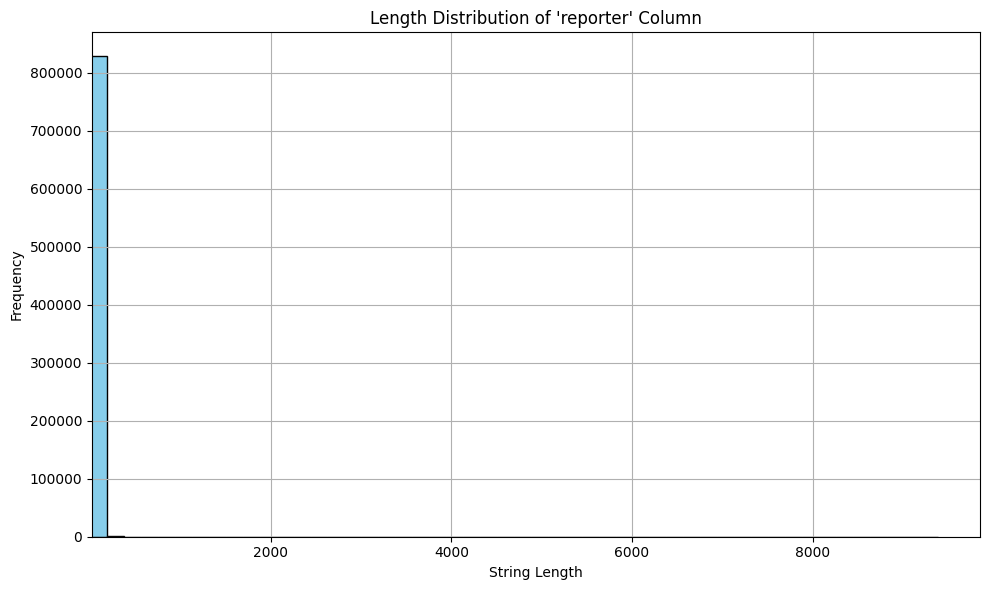

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(x_Data, bins=50, color='skyblue', edgecolor='black')
plt.title("Length Distribution of 'reporter' Column")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.xlim(left=20)
plt.tight_layout()
plt.show()

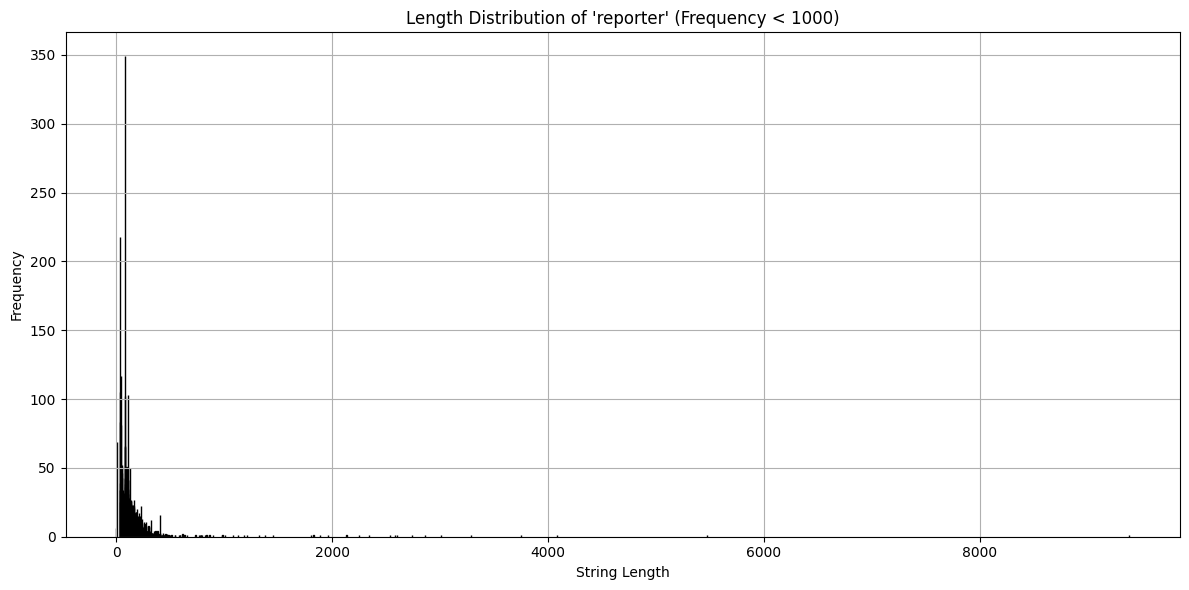

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 문자열 길이 계산
x_Data = df['reporter'].astype(str).str.len()

# 각 길이별 빈도수 계산
length_counts = x_Data.value_counts().sort_index()

# 빈도수 1000 미만 필터링
filtered_lengths = length_counts[length_counts < 400]

# 히스토그램 형태로 그리기
plt.figure(figsize=(12, 6))
plt.bar(filtered_lengths.index, filtered_lengths.values, color='orange', edgecolor='black')
plt.title("Length Distribution of 'reporter' (Frequency < 1000)")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
# 모든 공백 문자 제거: 스페이스, 탭, 줄바꿈 포함
cleaned_reporter = df['reporter'].astype(str).str.replace(r"\s+", "", regex=True)

# 400자 초과 행 필터링
long_reporters = df[cleaned_reporter.str.len() <20]

# 개수 확인
print(f"총 {len(long_reporters)}개의 행이 공백 제거 후 400자를 초과합니다.")

# reporter 내용 출력
for i, val in enumerate(long_reporters['reporter'].unique(), 1):
    print(f"\n--- {i}번째 ---")
    print(val)  # 앞 1000자까지만 출력


총 791208개의 행이 공백 제거 후 400자를 초과합니다.

--- 1번째 ---
김나인 기자

--- 2번째 ---
김광태 기자

--- 3번째 ---
김대성 기자

--- 4번째 ---
김성준 기자

--- 5번째 ---
강민성 기자

--- 6번째 ---
김영욱 기자

--- 7번째 ---
팽동현 기자

--- 8번째 ---
안경애 기자

--- 9번째 ---
이준기 기자

--- 10번째 ---
윤선영 기자

--- 11번째 ---
이상현 기자

--- 12번째 ---
박한나 기자

--- 13번째 ---
장우진 기자

--- 14번째 ---
전혜인 기자

--- 15번째 ---
김수연 기자

--- 16번째 ---
강승현 기자

--- 17번째 ---
정석준 기자

--- 18번째 ---
이상훈 기자

--- 19번째 ---
김미경 기자

--- 20번째 ---
임재섭 기자

--- 21번째 ---
한기호 기자

--- 22번째 ---
최상현 기자

--- 23번째 ---
안소현 기자

--- 24번째 ---
김남석 기자

--- 25번째 ---
신하연 기자

--- 26번째 ---
이윤희 기자

--- 27번째 ---
이미선 기자

--- 28번째 ---
김경렬 기자

--- 29번째 ---
이미연 기자

--- 30번째 ---
박성기 기자

--- 31번째 ---
임성원 기자

--- 32번째 ---
박순원 기자

--- 33번째 ---
박은희 기자

--- 34번째 ---
박영서 기자

--- 35번째 ---
이규화 기자

--- 36번째 ---
nan

--- 37번째 ---
박양수 기자

--- 38번째 ---
이슬기 기자

--- 39번째 ---
디지털뉴스부

--- 40번째 ---
정래연 기자

--- 41번째 ---
박정일 기자

--- 42번째 ---
강현철 기자

--- 43번째 ---
김세희 기자

--- 44번째 ---
장환순 기자

--- 45번째 ---
노희근 기자

--- 46번째 ---
김춘성 기자

--- 47번째 -

In [101]:
# 조건: '기자' 포함 + 길이 30 미만
filtered = df[
    df['reporter'].astype(str).str.contains("기자") &
    (df['reporter'].astype(str).str.len() < 30)
]

# 개수 출력
print(f"조건을 만족하는 행 수: {len(filtered)}")

# 내용 확인
for i, val in enumerate(filtered['reporter'].unique(), 1):
    print(f"\n--- {i}번째 ---")
    print(val)


조건을 만족하는 행 수: 557118

--- 1번째 ---
김나인 기자

--- 2번째 ---
김광태 기자

--- 3번째 ---
김대성 기자

--- 4번째 ---
김성준 기자

--- 5번째 ---
강민성 기자

--- 6번째 ---
김영욱 기자

--- 7번째 ---
팽동현 기자

--- 8번째 ---
안경애 기자

--- 9번째 ---
이준기 기자

--- 10번째 ---
윤선영 기자

--- 11번째 ---
이상현 기자

--- 12번째 ---
박한나 기자

--- 13번째 ---
장우진 기자

--- 14번째 ---
전혜인 기자

--- 15번째 ---
김수연 기자

--- 16번째 ---
강승현 기자

--- 17번째 ---
정석준 기자

--- 18번째 ---
이상훈 기자

--- 19번째 ---
김미경 기자

--- 20번째 ---
임재섭 기자

--- 21번째 ---
한기호 기자

--- 22번째 ---
최상현 기자

--- 23번째 ---
안소현 기자

--- 24번째 ---
김남석 기자

--- 25번째 ---
신하연 기자

--- 26번째 ---
이윤희 기자

--- 27번째 ---
이미선 기자

--- 28번째 ---
김경렬 기자

--- 29번째 ---
이미연 기자

--- 30번째 ---
박성기 기자

--- 31번째 ---
임성원 기자

--- 32번째 ---
박순원 기자

--- 33번째 ---
박은희 기자

--- 34번째 ---
박영서 기자

--- 35번째 ---
이규화 기자

--- 36번째 ---
박양수 기자

--- 37번째 ---
이슬기 기자

--- 38번째 ---
정래연 기자

--- 39번째 ---
박정일 기자

--- 40번째 ---
강현철 기자

--- 41번째 ---
김세희 기자

--- 42번째 ---
장환순 기자

--- 43번째 ---
노희근 기자

--- 44번째 ---
김춘성 기자

--- 45번째 ---
김화균 기자

--- 46번째 ---
연소연 기자

--- 47번째 ---
권준영 기자

